Overlays (Blending)

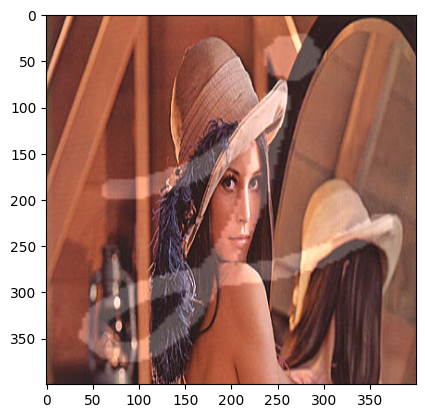

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image1BGR = cv2.imread('images/lena.jpg')
image2BGR = cv2.imread('images/j.png')

image1RGB = cv2.cvtColor(image1BGR, cv2.COLOR_BGR2RGB)
image2RGB = cv2.cvtColor(image2BGR, cv2.COLOR_BGR2RGB)

resized1 = cv2.resize(image1RGB, (400,400))
resized2 = cv2.resize(image2RGB, (400,400))

blended = cv2.addWeighted(resized1, 1, resized2, 0.2, 0)

plt.imshow(blended)
plt.show()

Resize the second image to the size of the first image and blend them 


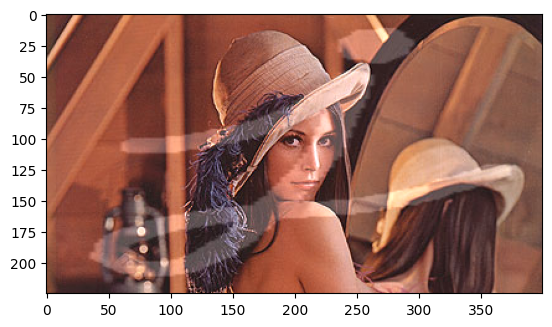

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image1BGR = cv2.imread('images/lena.jpg')
image2BGR = cv2.imread('images/j.png')

image1RGB = cv2.cvtColor(image1BGR, cv2.COLOR_BGR2RGB)
image2RGB = cv2.cvtColor(image2BGR, cv2.COLOR_BGR2RGB)

image1size = image1RGB.shape

#resized1 = cv2.resize(image1RGB, (400,400))
resized2 = cv2.resize(image2RGB, (image1size[1],image1size[0]))

blended = cv2.addWeighted(image1RGB, 1, resized2, 0.2, 0)

plt.imshow(blended)
plt.show()

Binary Thresholding

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html


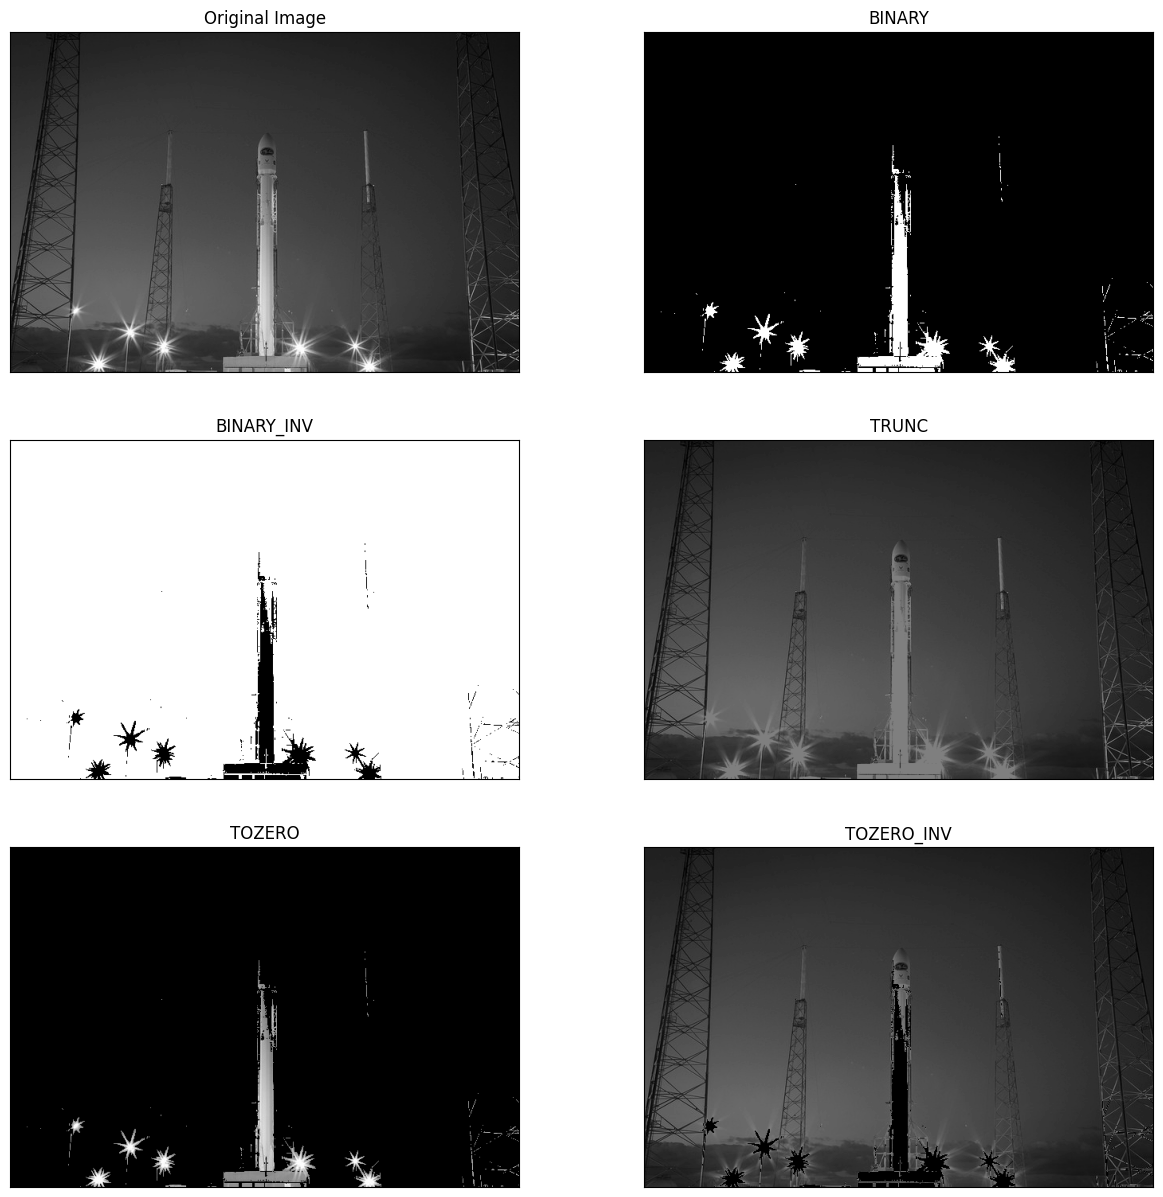

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('images/rocket.jpg', cv2.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
 
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

Adaptive Thresholding

Adaptive thresholding is an image processing technique used to binarize an image, i.e., convert it into a binary image where pixel values are either 0 (black) or 255 (white). Unlike global thresholding, where a single threshold value is applied across the entire image, adaptive thresholding calculates the threshold value for each pixel dynamically based on its surrounding pixel values. This makes it particularly useful for images with uneven lighting or varying background intensities.


In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

In addition to the parameters described above, the method cv.adaptiveThreshold takes three input parameters:

The adaptiveMethod decides how the threshold value is calculated:

cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

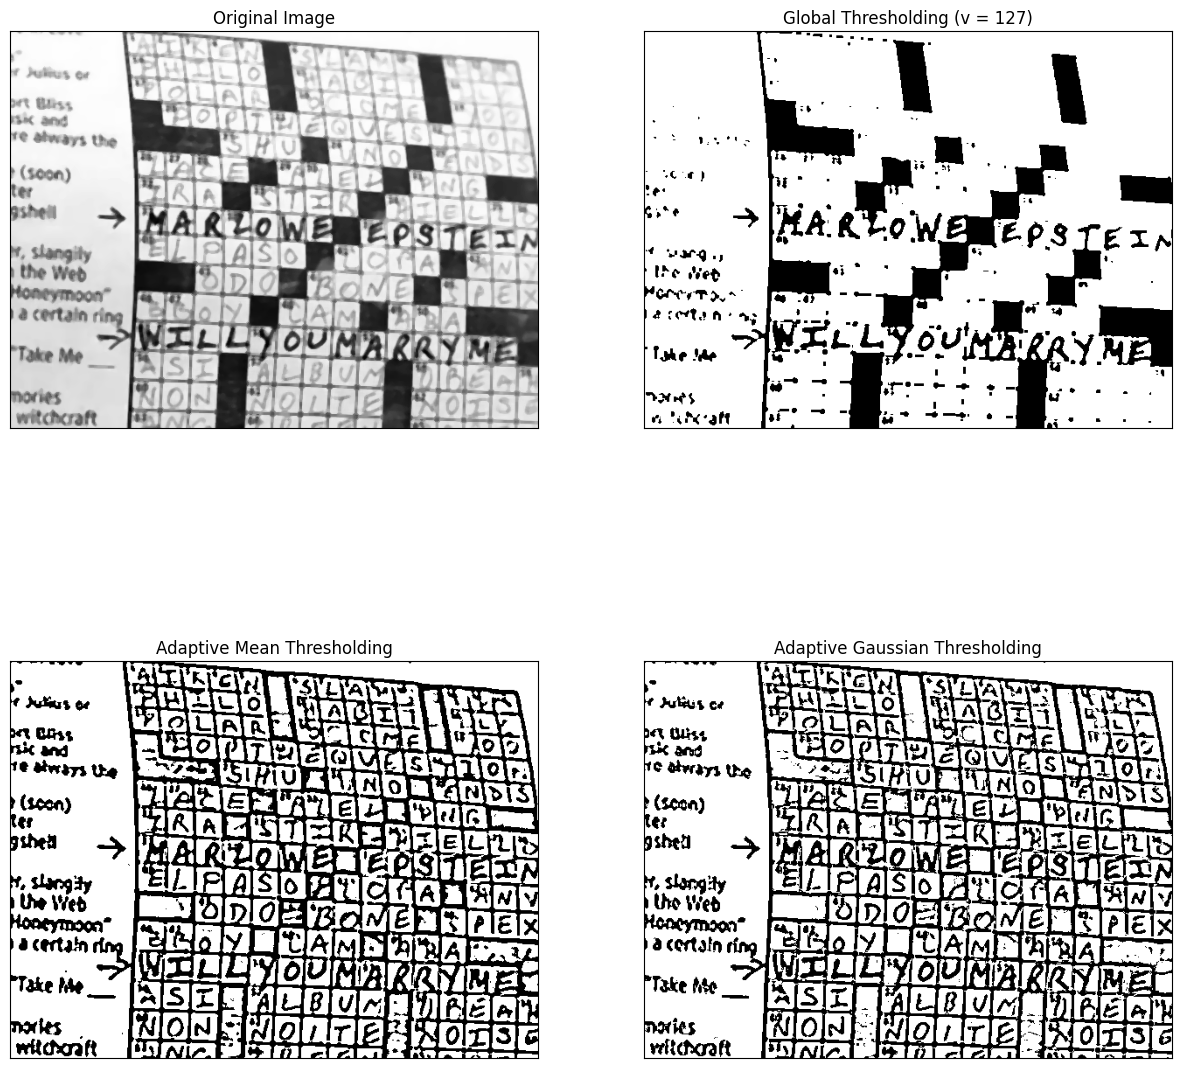

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('images/creative-proposal.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv2.medianBlur(img,5)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,3)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(15,15))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Morphology

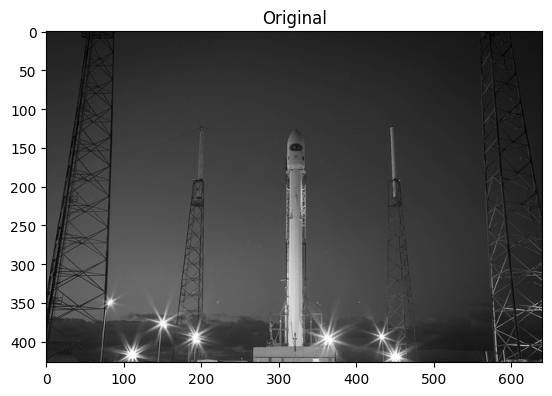

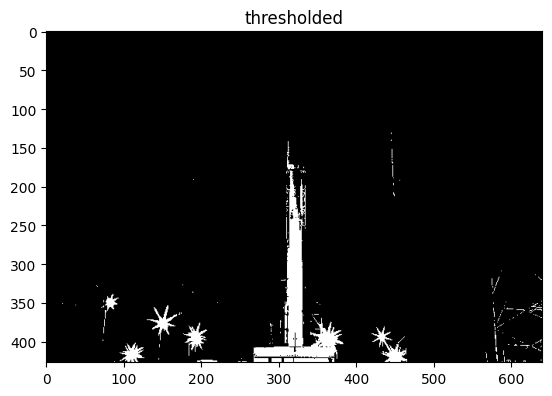

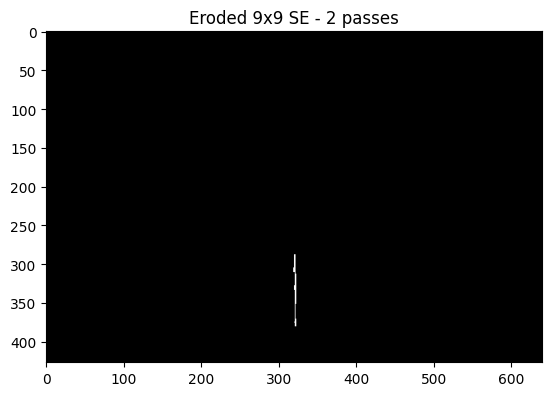

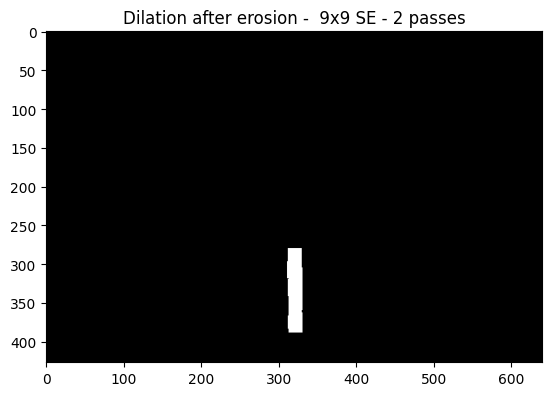

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
imgGray = cv2.imread('images/rocket.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(imgGray,'gray',vmin=0,vmax=255)
plt.title("Original")
plt.show()

ret,thresh1 = cv2.threshold(imgGray,127,255,cv2.THRESH_BINARY)

plt.imshow(thresh1,'gray',vmin=0,vmax=255)
plt.title("thresholded")
plt.show()

SE = np.ones((9,9), np.uint8)
erosion= cv2.erode(thresh1, SE, iterations=2)  #EROSION EXAMPLE
plt.imshow(erosion,'gray',vmin=0,vmax=255)
plt.title("Eroded 9x9 SE - 2 passes")
plt.show()

SE = np.ones((9,9), np.uint8)
dilation= cv2.dilate(erosion, SE, iterations=2) #DILATION EXAMPLE
plt.imshow(dilation,'gray',vmin=0,vmax=255)
plt.title("Dilation after erosion -  9x9 SE - 2 passes")
plt.show()

#Performing erosion followed by dialtion is called "Morphological Opening"

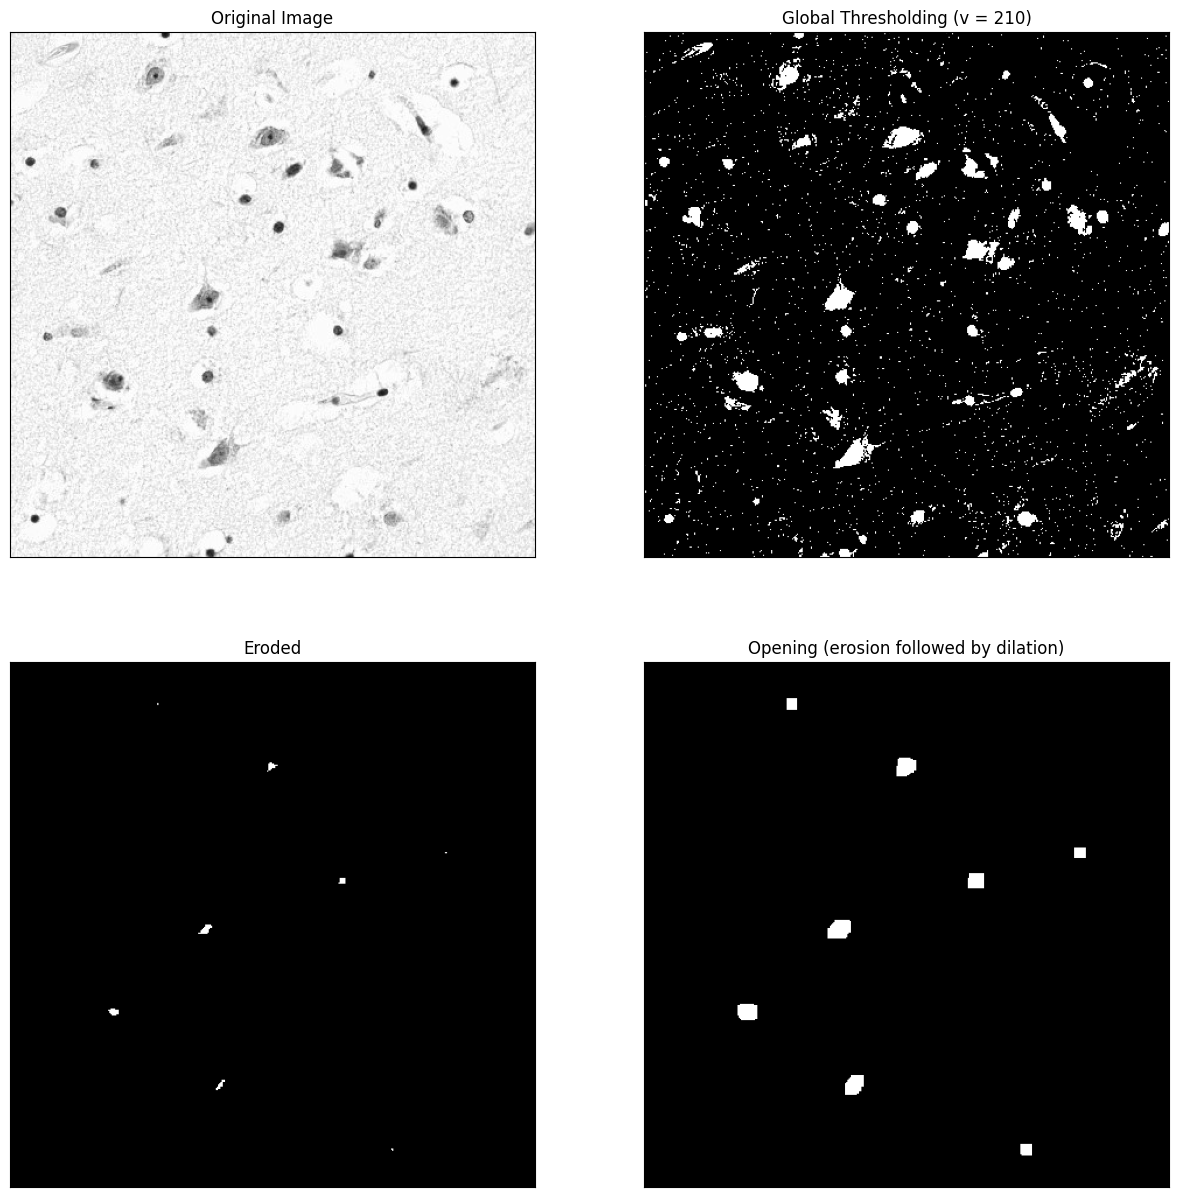

In [14]:
#Morphological Opening

import cv2
import numpy as np
from matplotlib import pyplot as plt
 
imgGray = cv2.imread('images/cells.jpg', cv2.IMREAD_GRAYSCALE)

ret,thresh1 = cv2.threshold(imgGray,210,255,cv2.THRESH_BINARY_INV)

SE = np.ones((9,9), np.uint8)
erosion= cv2.erode(thresh1, SE, iterations=1)  #EROSION EXAMPLE

SE = np.ones((9,9), np.uint8)
dilation= cv2.dilate(erosion, SE, iterations=1) #DILATION EXAMPLE


titles = ['Original Image', 'Global Thresholding (v = 210)',
            'Eroded', 'Opening (erosion followed by dilation)']
images = [imgGray, thresh1, erosion, dilation]

plt.figure(figsize=(15,15))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

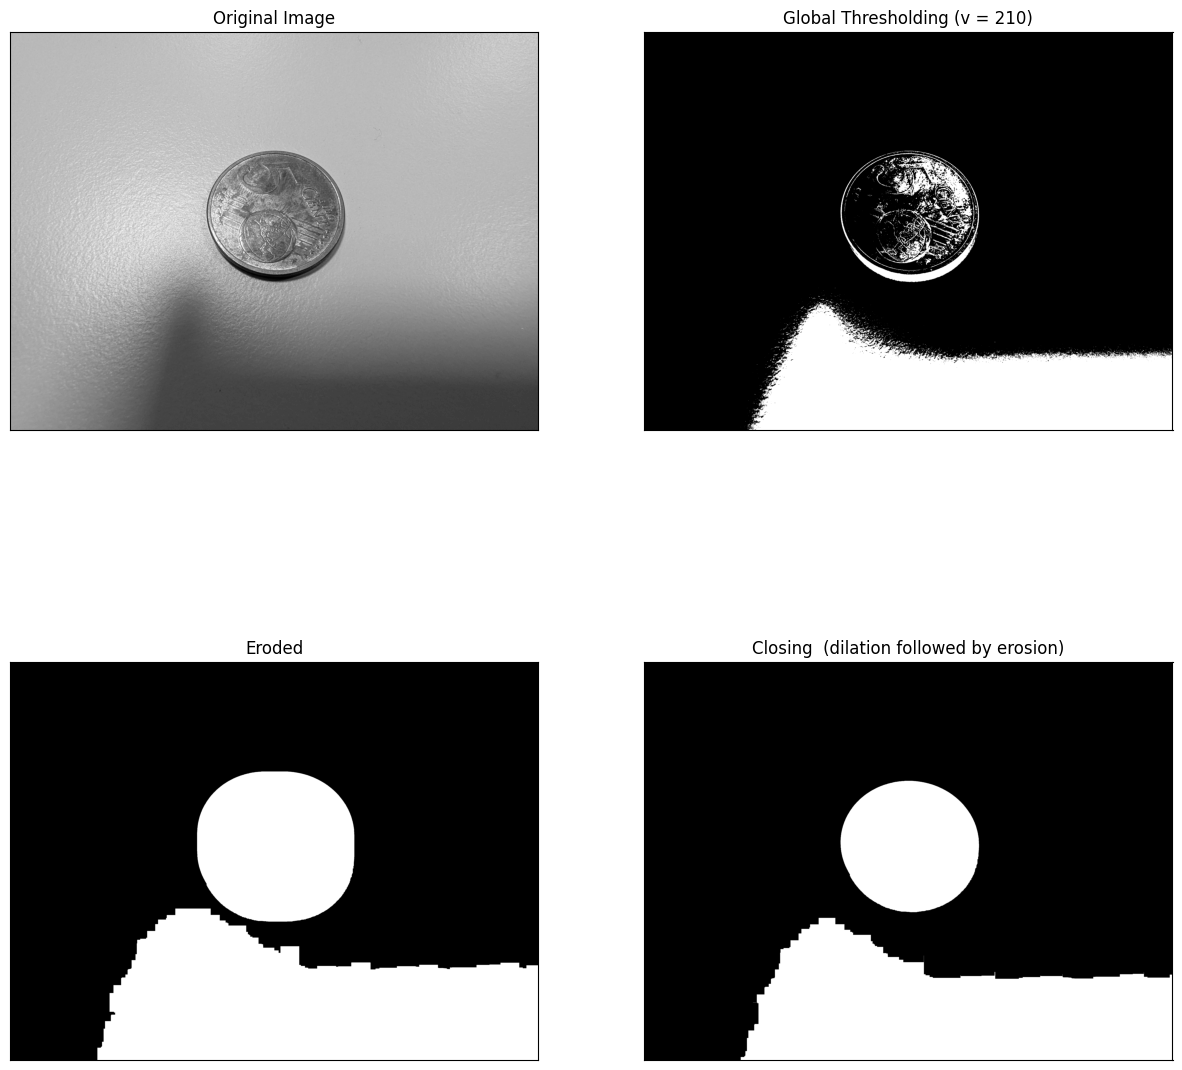

In [ ]:
#Morphological Closing

import cv2
import numpy as np
from matplotlib import pyplot as plt
 
imgGray = cv2.imread('images/coin.jpg', cv2.IMREAD_GRAYSCALE)


ret,thresh1 = cv2.threshold(imgGray,100,255,cv2.THRESH_BINARY_INV)

SE = np.ones((9,9), np.uint8)
erosion= cv2.dilate(thresh1, SE, iterations=18)  #EROSION EXAMPLE

SE = np.ones((9,9), np.uint8)
dilation= cv2.erode(erosion, SE, iterations=18) #DILATION EXAMPLE


titles = ['Original Image', 'Global Thresholding (v = 210)',
            'Dilated', 'Closing  (dilation followed by erosion)']
images = [imgGray, thresh1, erosion, dilation]

plt.figure(figsize=(15,15))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

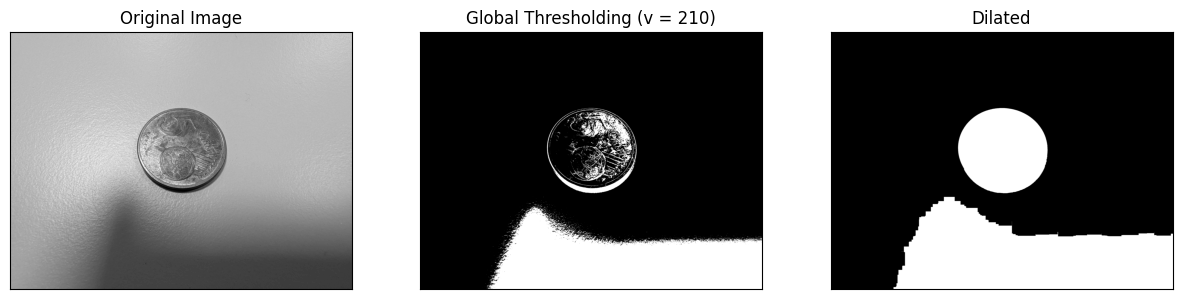

In [59]:
#Morphological Closing with MorphologyEx function

import cv2
import numpy as np
from matplotlib import pyplot as plt
 
imgGray = cv2.imread('images/coin.jpg', cv2.IMREAD_GRAYSCALE)


ret,thresh1 = cv2.threshold(imgGray,100,255,cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel, iterations=18)


titles = ['Original Image', 'Global Thresholding (v = 210)',
            'Dilated', 'Closing  (dilation followed by erosion)']
images = [imgGray, thresh1, closing]

plt.figure(figsize=(15,15))

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()